# Assignment - 06
#### Read weather data from 
https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, index_col='date', low_memory=False,parse_dates=True,date_format='%d-%b-%Y %H:%M')
df.columns.to_list()
print(df.head(3))

                     ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                          
1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   

                        msl  ind.3 wdsp  ind.4 wddir  ww   w  sun    vis clht  \
date                                                                            
1996-04-10 14:00:00  1016.7      0    0      0     0  25  81  0.0  35000   32   
1996-07-31 08:00:00  1011.4      0    0      0     0  25  82  0.0  40000   45   
1996-07-31 09:00:00  1011.4      0    0      0     0  80  81  0.0   8000   32   

                    clamt  
date                       
1996-04-10 14:00:00     5  
1996-07-31 08:00:00     5  
1996-07-31 09:00:00     7  


In [3]:
# Drop unwandted columns
df = df.drop(columns=['ind', 'rain', 'ind.1', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt'])

In [4]:
# convert blank data to 0
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [5]:
# convert date time to date
df['DATE']=pd.to_datetime(df.index,format='%d-%b-%Y %H:%M').date
# convert the date time to month
df['MONTH']=pd.to_datetime(df.index,format='%d-%b-%Y %H:%M').year.astype(dtype='str') +"-"+ pd.to_datetime(df.index,format='%d-%b-%Y %H:%M').month.astype(dtype='str')

print(df.head(3))

                     temp  wdsp        DATE   MONTH
date                                               
1996-04-10 14:00:00  11.5   0.0  1996-04-10  1996-4
1996-07-31 08:00:00  11.5   0.0  1996-07-31  1996-7
1996-07-31 09:00:00  11.6   0.0  1996-07-31  1996-7


<Axes: title={'center': 'Hourly Temperature Data'}, xlabel='Date', ylabel='Temperature (°C)'>

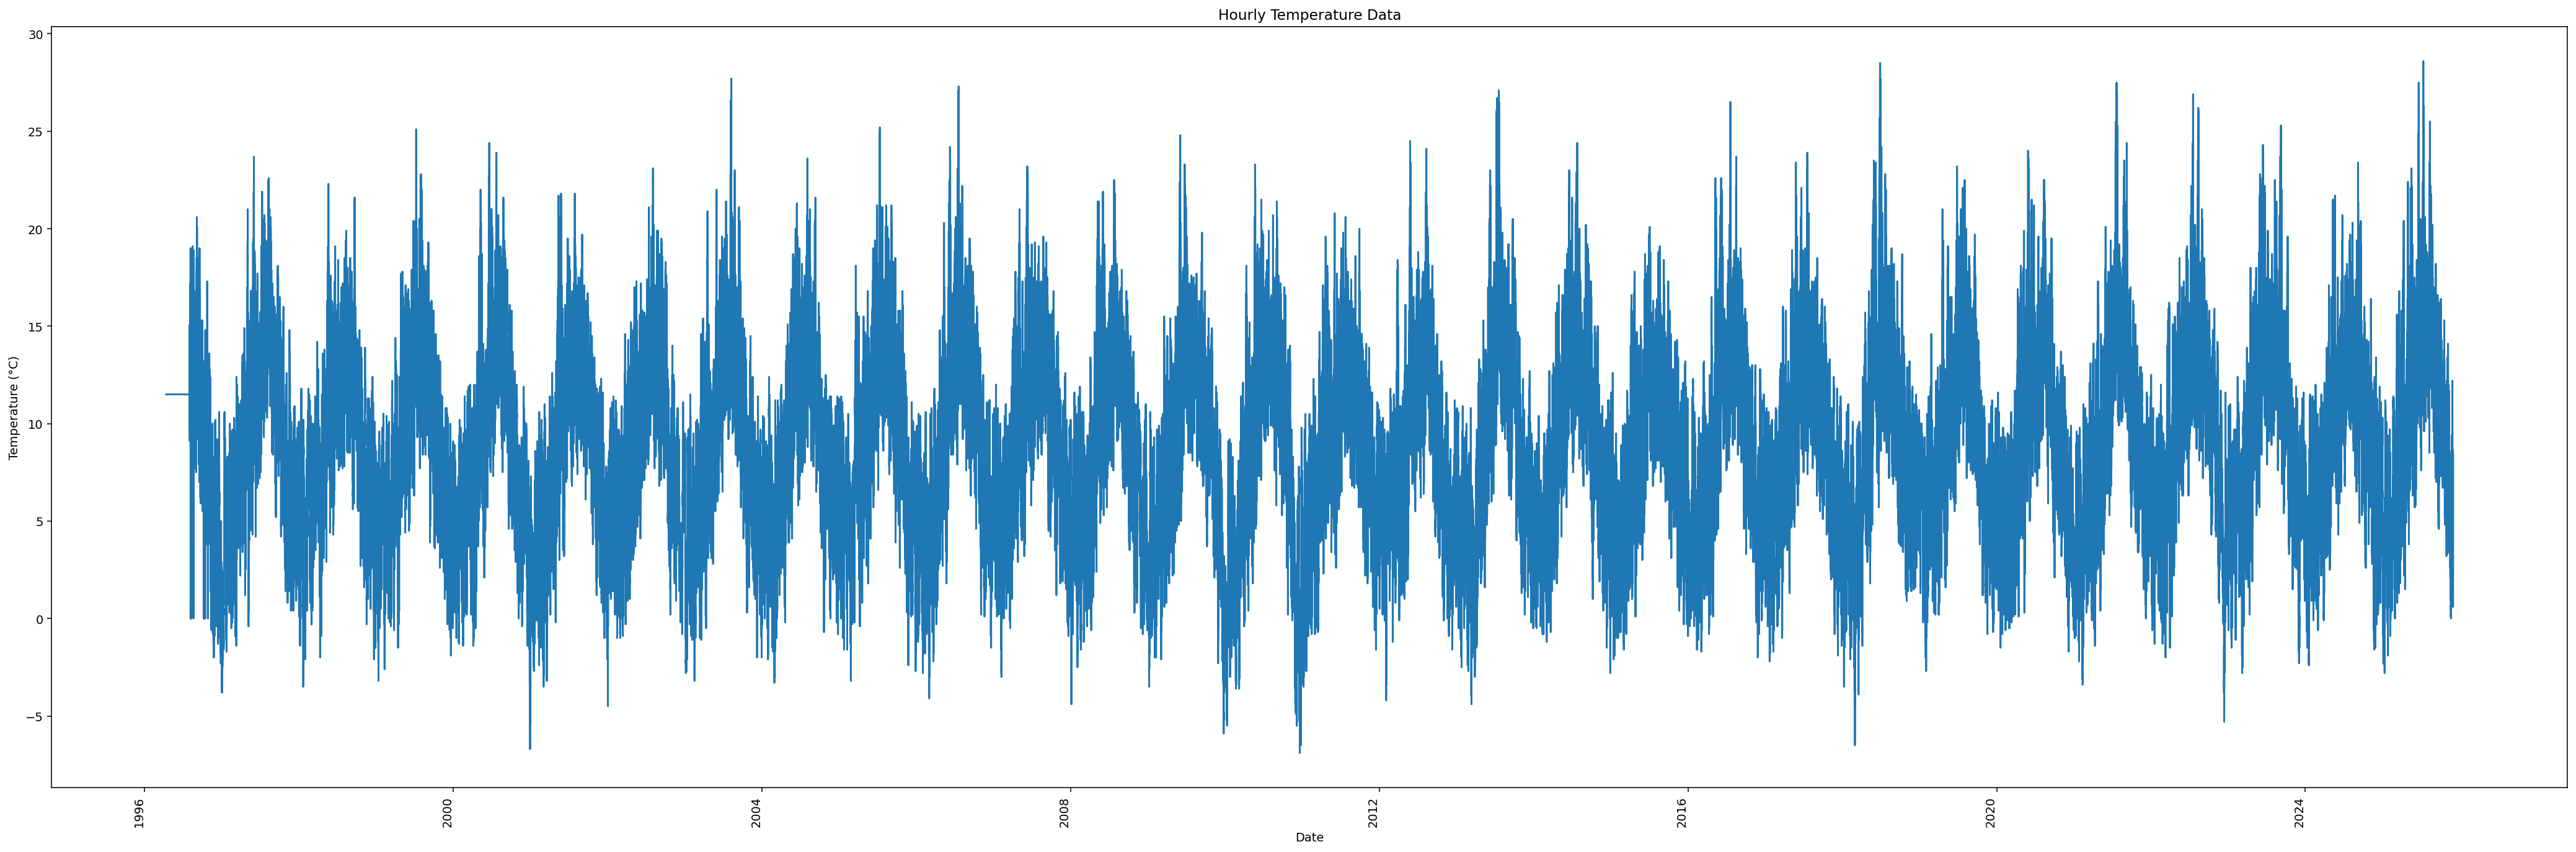

In [6]:
# Plot the hourly temperature data
fig, ax = plt.subplots(figsize=(30, 10), dpi=140)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Hourly Temperature Data')
ax.axes.autoscale('both')
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
sns.lineplot(data=df, x='date', y='temp',ax=ax)

In [7]:
daily_avg_temp = df.groupby('DATE')['temp'].mean()
print(daily_avg_temp.head(3))

DATE
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
Name: temp, dtype: float64


<Axes: title={'center': 'Daily Average Temperature'}, xlabel='Date', ylabel='Temperature (°C)'>

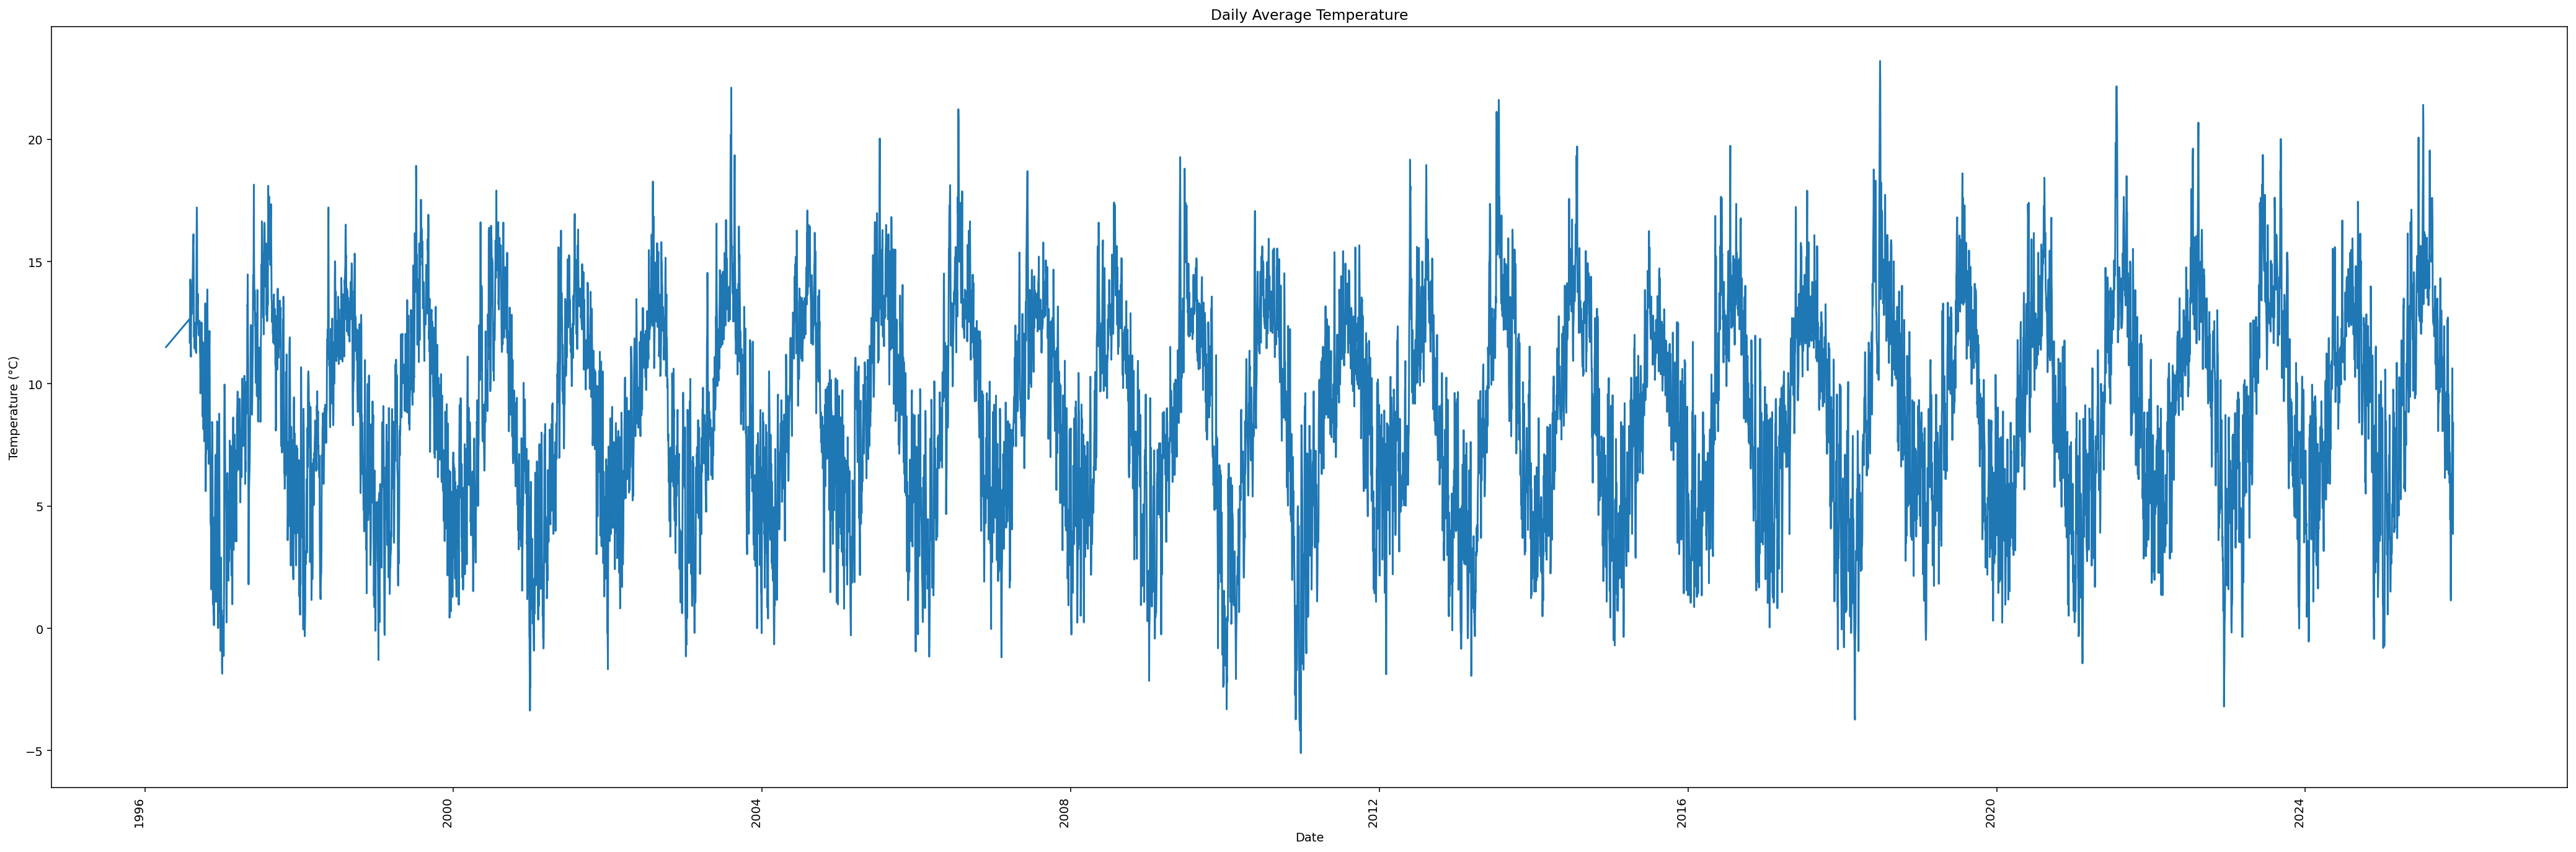

In [8]:
# plot the daily average temperature
fig, ax = plt.subplots(figsize=(30, 10), dpi=140)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Daily Average Temperature')
ax.axes.autoscale('both')
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
sns.lineplot(data=daily_avg_temp, ax=ax)

In [9]:
monthly_avg_temp = df.groupby('MONTH')['temp'].mean()
print(monthly_avg_temp)

MONTH
1996-10     9.614113
1996-11     4.909444
1996-12     3.209946
1996-4     11.500000
1996-7     12.650000
             ...    
2025-5     12.409274
2025-6     13.433889
2025-7     15.068280
2025-8     15.178495
2025-9     11.368056
Name: temp, Length: 355, dtype: float64


<Axes: title={'center': 'Monthly Average Temperature (°C)'}, xlabel='Month', ylabel='Temperature (°C)'>

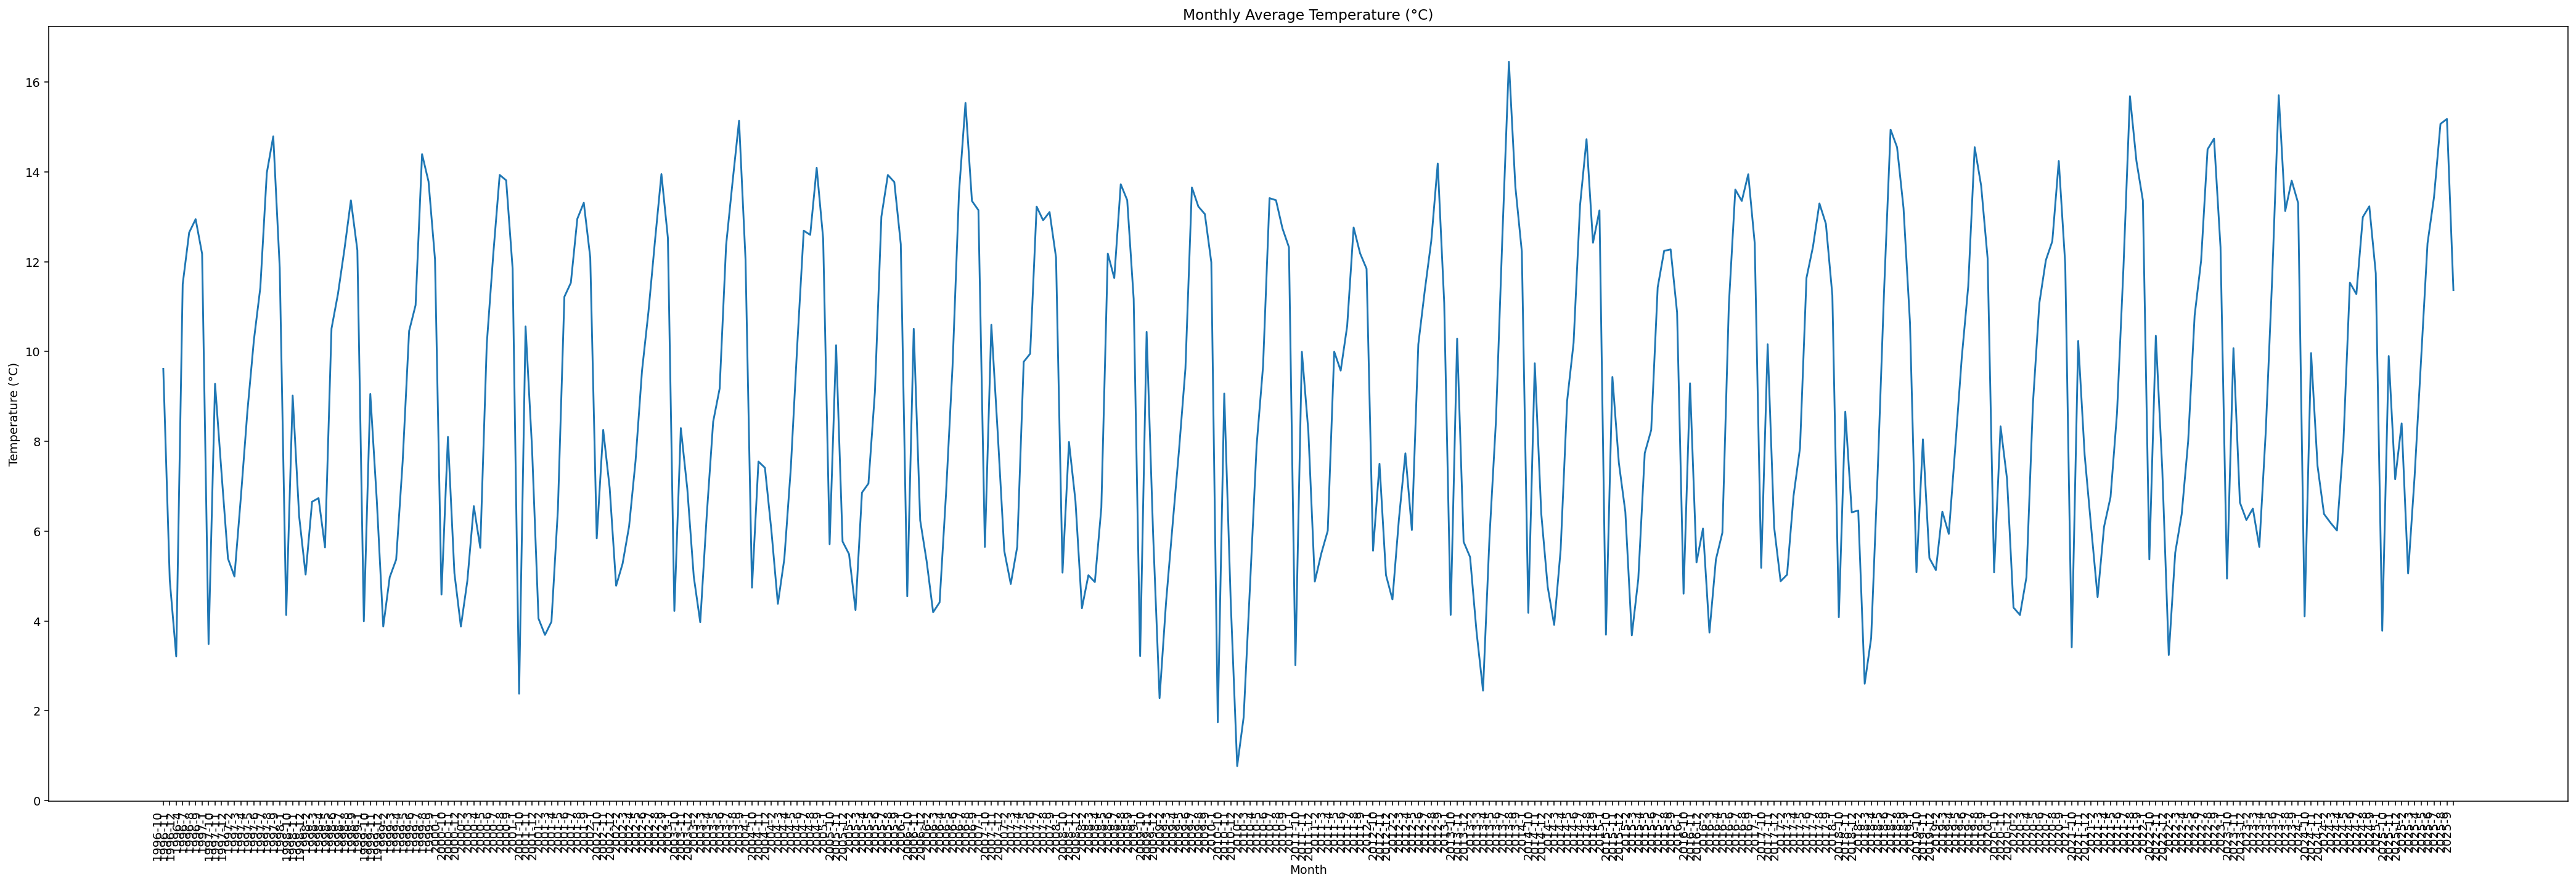

In [10]:
# plot the daily average temperature
fig, ax = plt.subplots(figsize=(30, 10), dpi=140)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Monthly Average Temperature (°C)')
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
sns.lineplot(data=monthly_avg_temp, ax=ax)

In [11]:
rolling_wind_speed = df['wdsp'].rolling(window=24).mean()
print(rolling_wind_speed)

date
1996-04-10 14:00:00          NaN
1996-07-31 08:00:00          NaN
1996-07-31 09:00:00          NaN
1996-07-31 10:00:00          NaN
1996-07-31 11:00:00          NaN
                         ...    
2025-11-30 20:00:00     9.625000
2025-11-30 21:00:00     9.916667
2025-11-30 22:00:00    10.041667
2025-11-30 23:00:00    10.041667
2025-12-01 00:00:00    10.166667
Name: wdsp, Length: 257154, dtype: float64


<Axes: title={'center': '24 hour Rolling Wind Speed'}, xlabel='Date', ylabel='Wind Speed (knot)'>

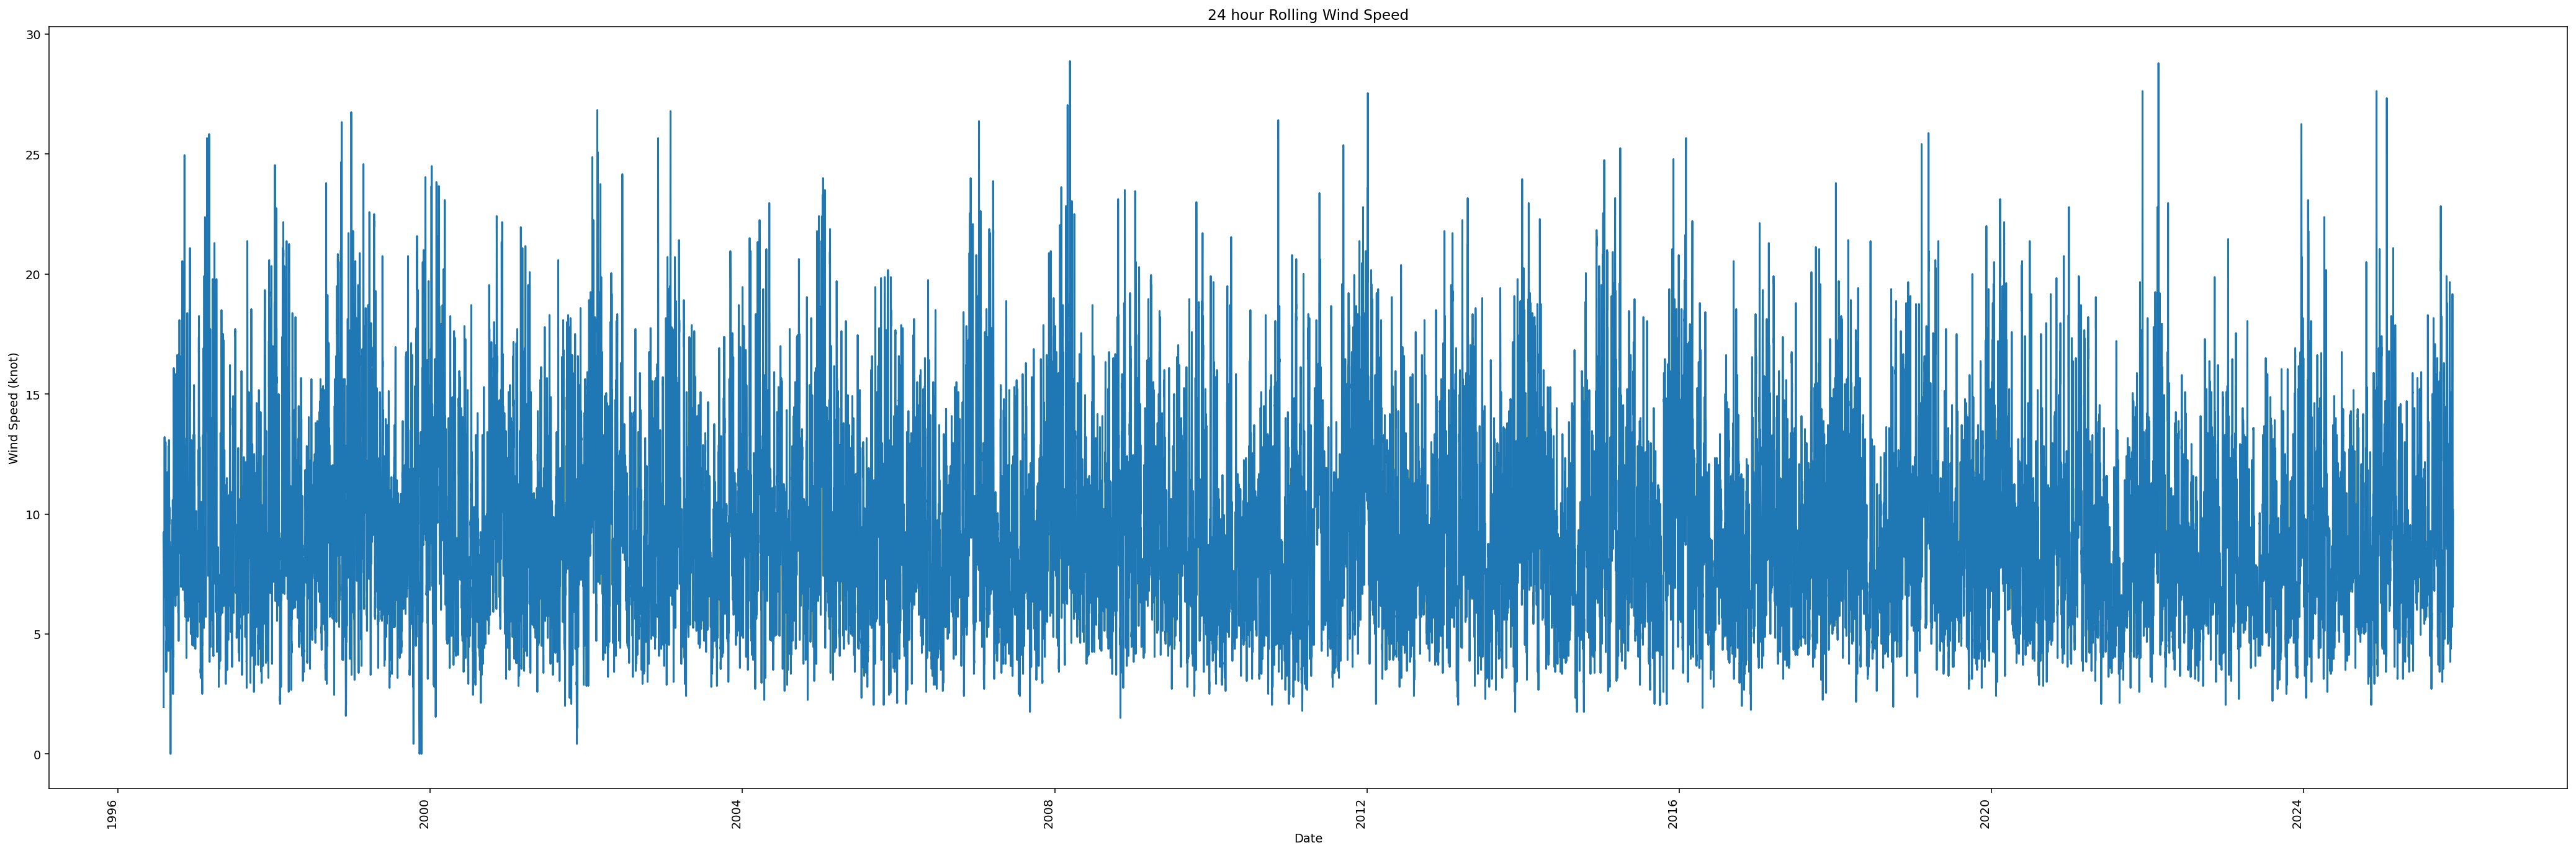

In [12]:
# plot the rolling wind speed
fig, ax = plt.subplots(figsize=(30, 10), dpi=140)
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (knot)')
ax.set_title('24 hour Rolling Wind Speed')
ax.axes.autoscale('both')
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
sns.lineplot(data=rolling_wind_speed,ax=ax)

In [13]:
# Get Maximum windspeed of the day
day_max_windspeed = df.groupby('DATE')['wdsp'].max()
print(day_max_windspeed.head(3))

DATE
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
Name: wdsp, dtype: float64


<Axes: title={'center': 'Daily Maximum Wind Speed'}, xlabel='Date', ylabel='Wind Speed (knot)'>

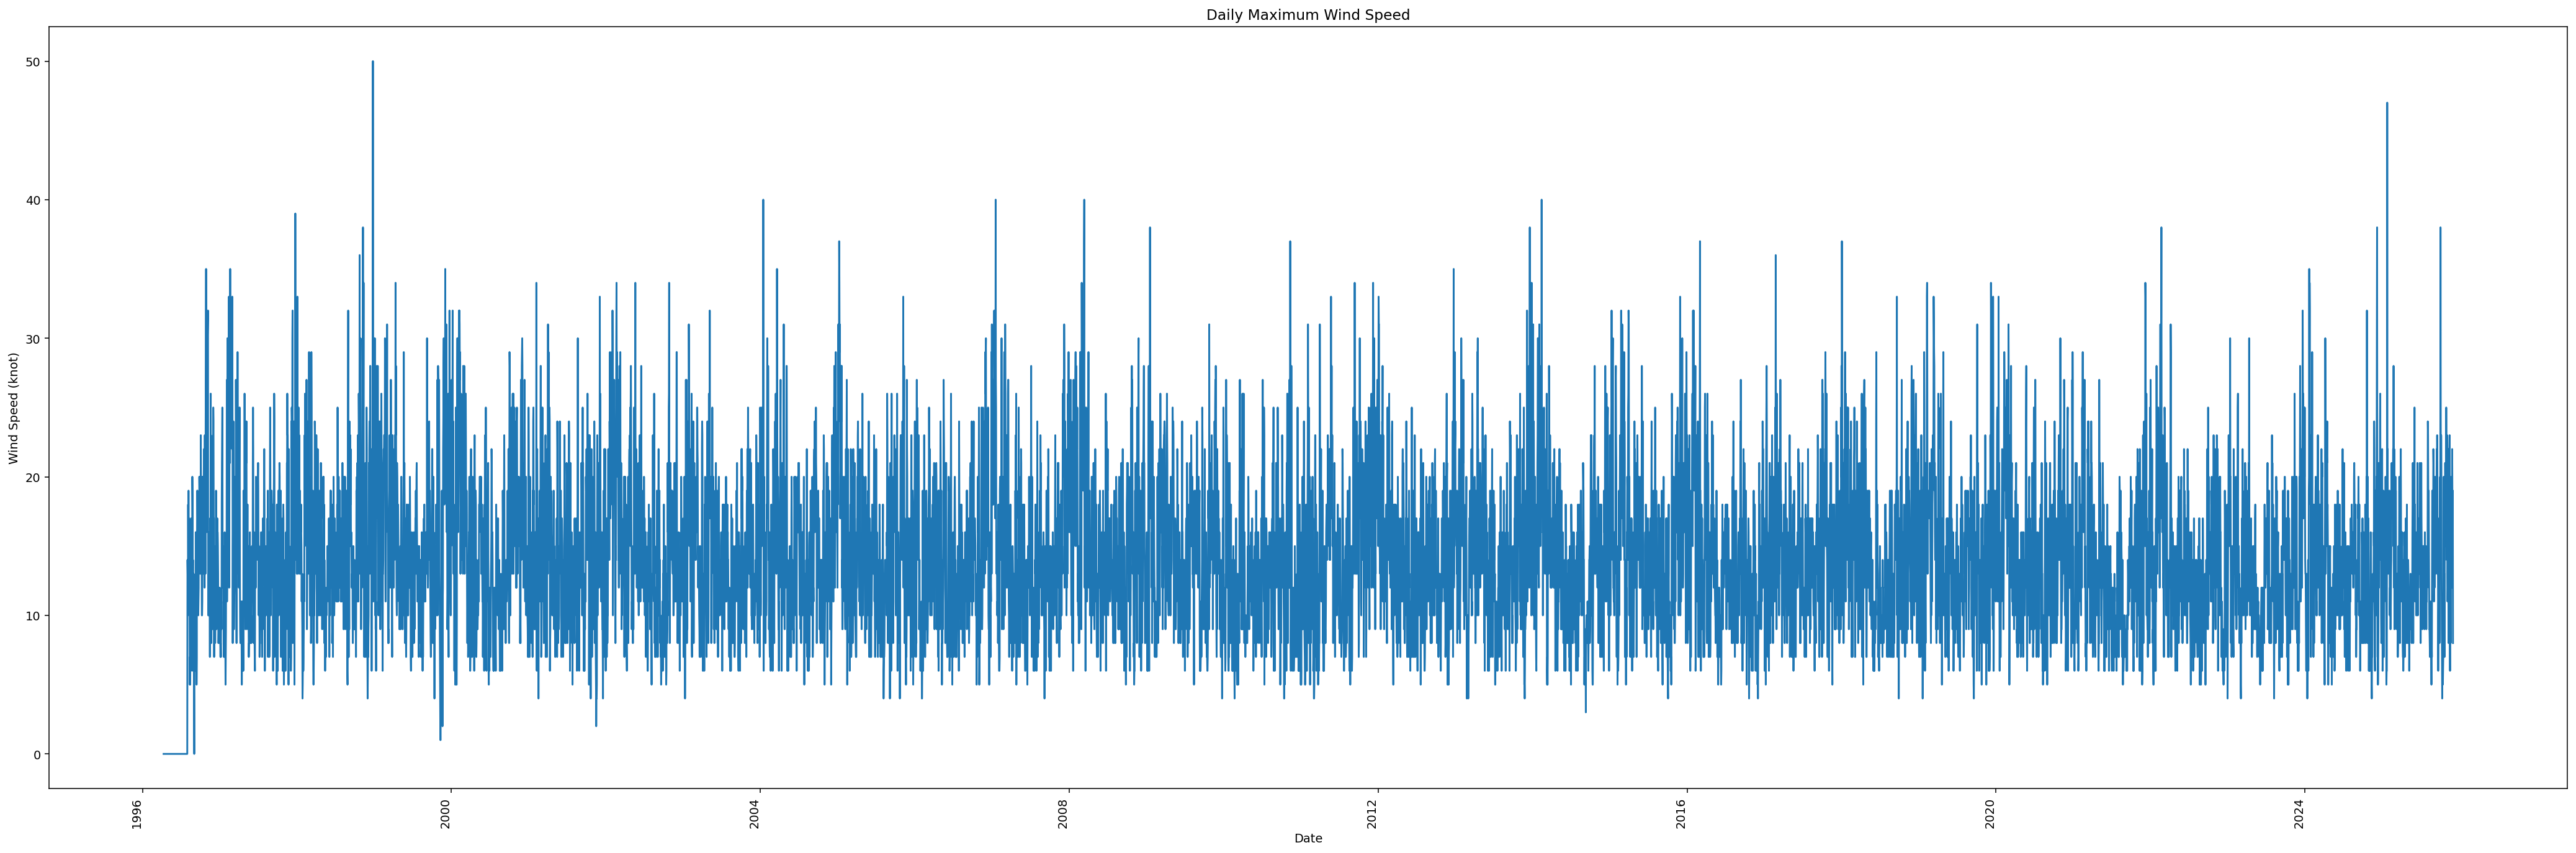

In [14]:
# plot the daily maximum wind speed
fig, ax = plt.subplots(figsize=(30, 10), dpi=140)
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (knot)')
ax.set_title('Daily Maximum Wind Speed')
ax.axes.autoscale('both')
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
sns.lineplot(data=day_max_windspeed,ax=ax)

In [15]:
# Calculate monthly mean of daily maximum windspeed
monthly_max_wind_speed = day_max_windspeed.groupby(pd.to_datetime(day_max_windspeed.index).year.astype(dtype='str') +"-"+ pd.to_datetime(day_max_windspeed.index).month.astype(dtype='str')).mean()
print(monthly_max_wind_speed.head(3))

DATE
1996-10    18.193548
1996-11    17.133333
1996-12    13.258065
Name: wdsp, dtype: float64


<Axes: title={'center': 'Monthly Mean of Daily Maximum Wind Speed'}, xlabel='Month', ylabel='Wind Speed (knot)'>

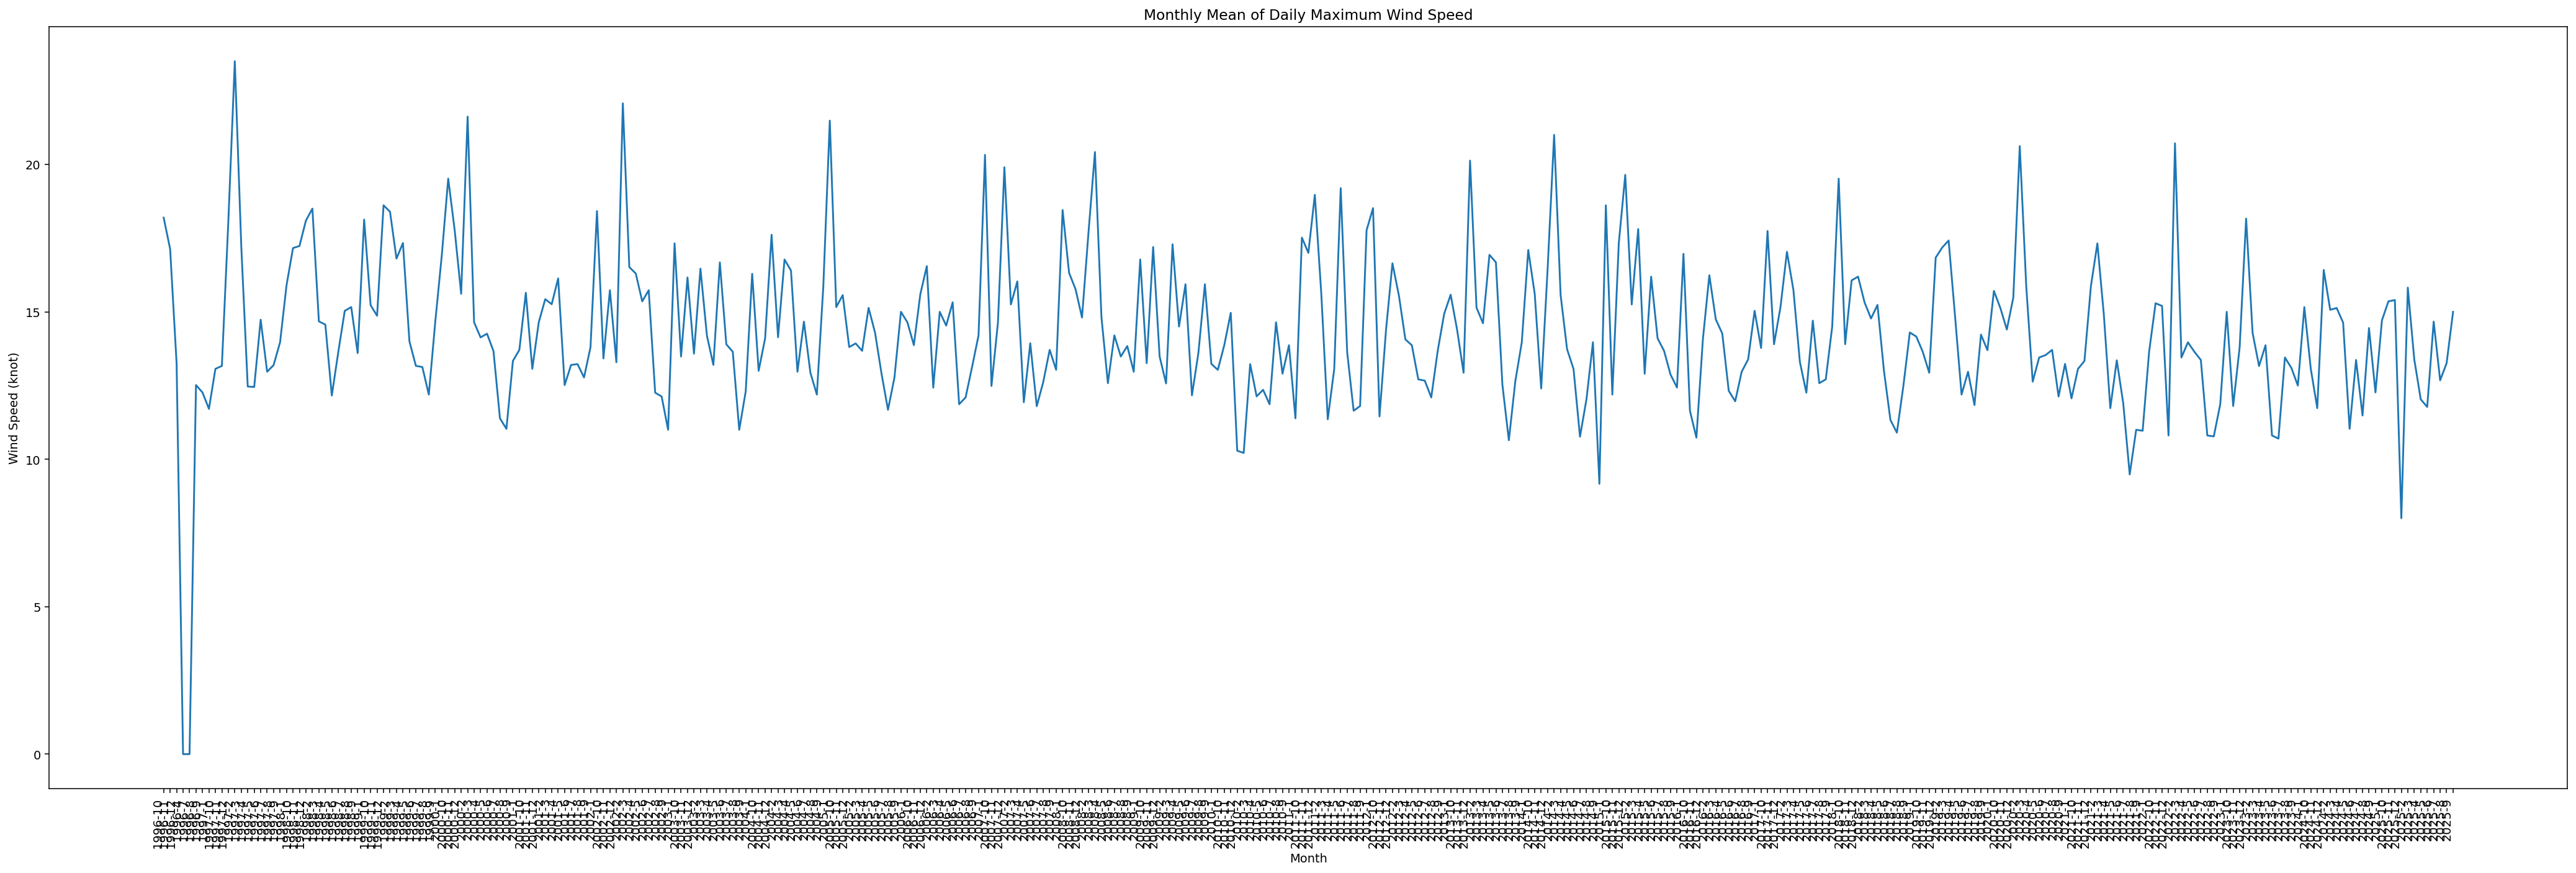

In [16]:
# plot the monthly mean of daily maximum wind speed
fig, ax = plt.subplots(figsize=(30, 10), dpi=140)
ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (knot)')
ax.set_title('Monthly Mean of Daily Maximum Wind Speed')
ax.axes.autoscale('both')
plt.gcf().autofmt_xdate(rotation=90)
plt.tight_layout()
sns.lineplot(data=monthly_max_wind_speed,ax=ax)

# End